# Activity 2.3 - CNN Network Architectures

**NAME:** Abo, Emmanuel Q.

**SECTION:** CPE32S8

#### Objective(s):

This activity aims to introduce how to use CNN network architectures

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to use pretrained model in predicting the object
* Evaluate the accuracy of each pretrained model

#### Resources:
* Jupyter Notebook
* MNIST

#### Procedures
Load the necessary libraries

In [1]:
from PIL import Image
from keras.preprocessing import image
import numpy as np
import pandas as pd

import cv2
from cv2 import imread

import matplotlib.pyplot as plt


Create a function that will capture and save the image from your webcam

In [2]:
def get_image(camera):
    retval, im = camera.read()
    return im

In [3]:
'''
def save_webcam_image(img_path):

    try:
        camera_port = 0
        ramp_frames = 10
    
        camera = cv2.VideoCapture(camera_port)

        for i in range(ramp_frames):
            retval, im_camera = camera.read()

        retval, im_camera = camera.read()

        im = cv2.resize(im_camera, (224, 224)).astype(np.float32)
        cv2.imwrite(img_path, im)
        del (camera)
        return True
    except ValueError as e:
        print("Image Capture Failed")
    return False
'''

'\ndef save_webcam_image(img_path):\n\n    try:\n        camera_port = 0\n        ramp_frames = 10\n    \n        camera = cv2.VideoCapture(camera_port)\n\n        for i in range(ramp_frames):\n            retval, im_camera = camera.read()\n\n        retval, im_camera = camera.read()\n\n        im = cv2.resize(im_camera, (224, 224)).astype(np.float32)\n        cv2.imwrite(img_path, im)\n        del (camera)\n        return True\n    except ValueError as e:\n        print("Image Capture Failed")\n    return False\n'

* Test your function.
* Place a clock or any object
* Display the saved image

In [17]:
img_path = "guitar.jpg"

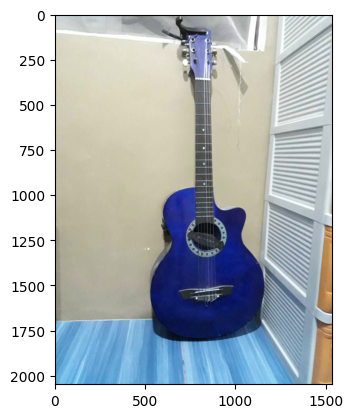

In [18]:
plt.imshow(imread(img_path))

Use VGG-16 pre-trained model

In [19]:
from keras.applications import vgg16


vgg16_model = vgg16.VGG16(weights='imagenet')
vgg16_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

Create a function to load model, image, preprocess input and targets

In [20]:
def predict_image(model, img_path, preprocess_input_fn, decode_predictions_fn, target_size=(224, 224)):

    img = image.load_img(img_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_fn(x)
    
    preds = model.predict(x)
    predictions_df = pd.DataFrame(decode_predictions_fn(preds, top=10)[0])
    predictions_df.columns = ["Predicted Class", "Name", "Probability"]
    return predictions_df

Predict the result

In [21]:
predict_image(vgg16_model, img_path, vgg16.preprocess_input, vgg16.decode_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step


,Predicted Class,Name,Probability
0,n02676566,acoustic_guitar,0.844235
1,n03272010,electric_guitar,0.116163
2,n02787622,banjo,0.019241
3,n02992211,cello,0.006275
4,n04536866,violin,0.005124
5,n04380533,table_lamp,0.002137
6,n03970156,plunger,0.000771
7,n04023962,punching_bag,0.000715
8,n04517823,vacuum,0.000627
9,n03838899,oboe,0.000571


Interpret the result of prediction using VGG16 model

#The first column shows the predicted class, the second shows the name of the class, and the last column shows the probability of the object being the actual object in the given image. Using the vgg16 model, the results show that the object is 84% an acoustic guitar.

Use Resnet50 pretrained model

In [22]:
from keras.applications import resnet50

resnet50_model = resnet50.ResNet50(weights='imagenet')

resnet50_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_3[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

Predict the result

In [23]:
predict_image(resnet50_model, img_path, resnet50.preprocess_input, resnet50.decode_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


,Predicted Class,Name,Probability
0,n02676566,acoustic_guitar,0.794205
1,n02787622,banjo,0.116429
2,n03272010,electric_guitar,0.088712
3,n03249569,drum,0.000127
4,n02992211,cello,0.000063
5,n03929660,pick,0.000049
6,n02840245,binder,0.000044
7,n04296562,stage,0.000039
8,n02672831,accordion,0.000028
9,n04536866,violin,0.000021


Interpret the result using RESNET50 pretrained model

#The results here shows that it is only 79% an acoustic guitar which is less than the previous model used.

#### Supplementary Activity

* Use at least three pretrained model and predict the result using the saved image. 
* Compare their accuracy results.

In [60]:
from keras.applications import xception
Xception_model = xception.Xception(weights='imagenet')

In [39]:
predict_image(Xception_model, img_path, xception.preprocess_input, xception.decode_predictions,(299,299))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 961ms/step


,Predicted Class,Name,Probability
0,n02676566,acoustic_guitar,0.870732
1,n02787622,banjo,0.019820
2,n03272010,electric_guitar,0.007363
3,n02992211,cello,0.004304
4,n03929660,pick,0.001431
5,n03124170,cowboy_hat,0.000696
6,n03494278,harmonica,0.000643
7,n03759954,microphone,0.000638
8,n03495258,harp,0.000461
9,n04259630,sombrero,0.000455


In [59]:
from keras.applications import efficientnet_v2
efficientnetv2s_model = efficientnet_v2.EfficientNetV2S(weights='imagenet')

In [50]:
predict_image(efficientnetv2s_model, img_path, efficientnet_v2.preprocess_input, efficientnet_v2.decode_predictions,(384,384))

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


,Predicted Class,Name,Probability
0,n02676566,acoustic_guitar,0.884709
1,n03272010,electric_guitar,0.017719
2,n02787622,banjo,0.009972
3,n02992211,cello,0.003054
4,n04536866,violin,0.001705
5,n03929660,pick,0.001319
6,n03124170,cowboy_hat,0.000665
7,n03494278,harmonica,0.000657
8,n02268853,damselfly,0.000435
9,n02672831,accordion,0.000433


In [58]:
from keras.applications import nasnet
nasnetlarge_model = nasnet.NASNetLarge(weights='imagenet')

In [55]:
predict_image(nasnetlarge_model, img_path, nasnet.preprocess_input, nasnet.decode_predictions,(331,331,3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


,Predicted Class,Name,Probability
0,n02676566,acoustic_guitar,0.882877
1,n03272010,electric_guitar,0.010878
2,n02787622,banjo,0.002682
3,n02992211,cello,0.001906
4,n03929660,pick,0.001344
5,n04536866,violin,0.000999
6,n03494278,harmonica,0.000687
7,n04296562,stage,0.000433
8,n03884397,panpipe,0.000344
9,n03495258,harp,0.000327


#The results among the three models used are almost similar with an 87% accuracy for xception model and an 88% accuracy for both nasnet and efficientnetv2s models.

#### Conclusion

#With this activity, I learned how useful it is to use transfer learning, because it makes it so much faster for training models. Additionally, the pre-trained models that I used were a great example for me to learn about how cnn network architectures work and how they excel in tasks such as image recognition.